<a href="https://colab.research.google.com/github/DataEtnos/DataEtnos/blob/main/Teste_previs%C3%B5es_de_aluguel_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
  #Setup
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots




#machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import RobustScaler, MinMaxScaler, LabelEncoder, StandardScaler
from sklearn import metrics
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.preprocessing import scale, minmax_scale, power_transform

DADOS : https://www.kaggle.com/code/juniorbueno/brazilian-houses-rent-various-regressions

biblioteca nova : https://scikit--learn-org.translate.goog/stable/modules/generated/sklearn.ensemble.HistGradientBoostingRegressor.html?_x_tr_sl=auto&_x_tr_tl=pt&_x_tr_hl=pt-BR&_x_tr_pto=wapp#sklearn.ensemble.HistGradientBoostingRegressor


## Colunas da tabela:

city: Cidade em que o imóvel está localizado.

Área: A área do imóvel.

rooms: Quantidade de quartos do imóvel.

bathroom: Quantidade de banheiros do imóvel.

parking spaces: Quantidade de vagas de garagem do imóvel.

floor: Andar do imóvel.

animal: Se aceita animais.

furniture: Se é mobiliado.

hoa (R$): Valor da taxa de condominio (homeowners association tax), em reais.

rent amount (R$): Valor do aluguel, em reais.

property tax (R$): Valor do IPTU, em reais.

fire insurance (R$): Valor do seguro incêndio, em reais.

total (R$): Valor total (soma das 4 colunas anteriores), em reais.


In [ ]:
# Subindo a base e verificando os dados
df = pd.read_csv('/content/houses_to_rent.csv')
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [ ]:
#pegando o nome das colunas para editar e fazer uma pequena limpeza
df.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')

In [ ]:
#editando dados e retirando R$ dos nomes de colunas
df.rename(columns={"hoa (R$)": "hoa"}, inplace=True)
df.rename(columns={"property tax (R$)": "property_tax"}, inplace=True)
df.rename(columns={"fire insurance (R$)": "fire_insurance"}, inplace=True)
df.rename(columns={"total (R$)": "total"}, inplace=True)
df.rename(columns={"rent amount (R$)": "rent_amount"}, inplace=True)
df.rename(columns={"parking spaces": "parking_spaces"}, inplace=True)
df.head()

,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [ ]:
#puxando dados verificando o tipo de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   city            10692 non-null  object
 1   area            10692 non-null  int64 
 2   rooms           10692 non-null  int64 
 3   bathroom        10692 non-null  int64 
 4   parking_spaces  10692 non-null  int64 
 5   floor           10692 non-null  object
 6   animal          10692 non-null  object
 7   furniture       10692 non-null  object
 8   hoa             10692 non-null  int64 
 9   rent_amount     10692 non-null  int64 
 10  property_tax    10692 non-null  int64 
 11  fire_insurance  10692 non-null  int64 
 12  total           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


In [ ]:
#retirando algumas metricas estatitcas como os quartil , media e devio padrão
df.describe()

,area,rooms,bathroom,parking_spaces,hoa,rent_amount,property_tax,fire_insurance,total
count,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04
mean,149.217920,2.506079,2.236813,1.609147,1.174022e+03,3896.247194,366.704358,53.300879,5.490487e+03
std,537.016942,1.171266,1.407198,1.589521,1.559231e+04,3408.545518,3107.832321,47.768031,1.648473e+04
min,11.000000,1.000000,1.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,56.000000,2.000000,1.000000,0.000000,1.700000e+02,1530.000000,38.000000,21.000000,2.061750e+03
50%,90.000000,2.000000,2.000000,1.000000,5.600000e+02,2661.000000,125.000000,36.000000,3.581500e+03
75%,182.000000,3.000000,3.000000,2.000000,1.237500e+03,5000.000000,375.000000,68.000000,6.768000e+03
max,46335.000000,13.000000,10.000000,12.000000,1.117000e+06,45000.000000,313700.000000,677.000000,1.120000e+06


In [ ]:
#verificando o tamanho dos dado
df.shape

(10692, 13)

<ipython-input-862-147ccbbb9a61>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='total', y='city', data=df, orient='h', palette='rocket',ci=None);
<ipython-input-862-147ccbbb9a61>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total', y='city', data=df, orient='h', palette='rocket',ci=None);


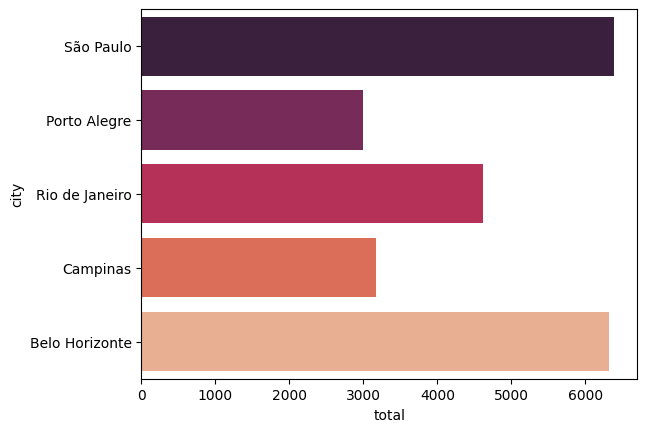

In [ ]:
# fazendo as primeras analises ,  verificando qual cidade te os alugueis mais caros
sns.barplot(x='total', y='city', data=df, orient='h', palette='rocket',ci=None);

<ipython-input-863-8897c0e86352>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='total', y='parking_spaces', data=df, orient='h', palette='rocket',ci = None);
<ipython-input-863-8897c0e86352>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total', y='parking_spaces', data=df, orient='h', palette='rocket',ci = None);


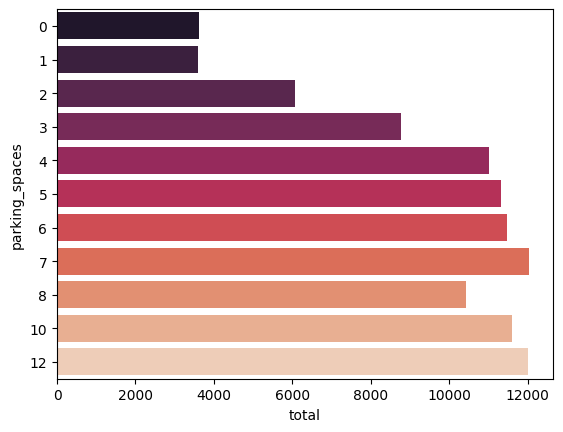

In [ ]:
#verificando se a quantidade de vaga e o valor do alugue por vaga
sns.barplot(x='total', y='parking_spaces', data=df, orient='h', palette='rocket',ci = None);

<ipython-input-864-e8e3ed738b9d>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='rent_amount', y='city', data=df, orient='h', palette='rocket',ci=None);
<ipython-input-864-e8e3ed738b9d>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rent_amount', y='city', data=df, orient='h', palette='rocket',ci=None);


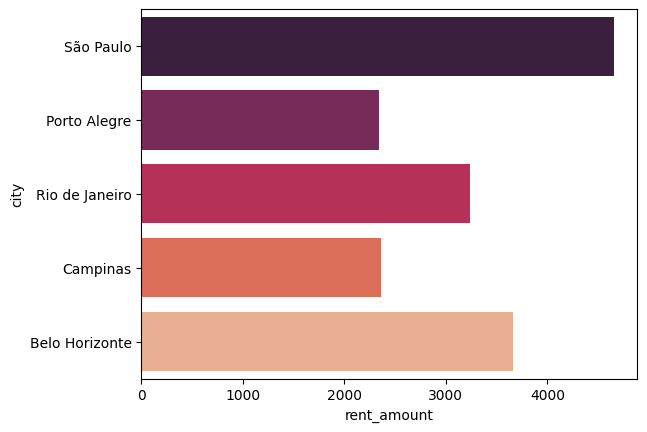

In [ ]:
sns.barplot(x='rent_amount', y='city', data=df, orient='h', palette='rocket',ci=None);

<ipython-input-865-9f785eaf2a02>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='rent_amount', y='parking_spaces', data=df, orient='h', palette='rocket',ci = None);
<ipython-input-865-9f785eaf2a02>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rent_amount', y='parking_spaces', data=df, orient='h', palette='rocket',ci = None);


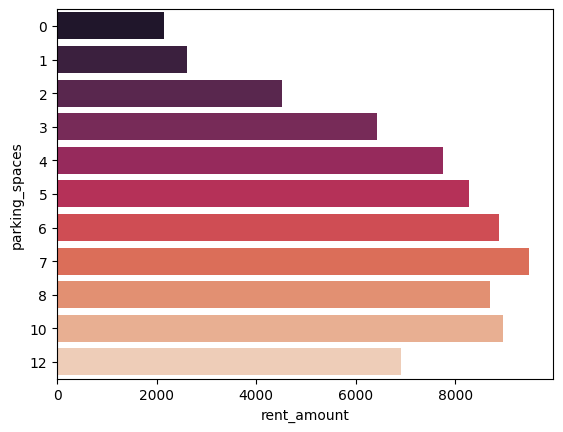

In [ ]:
sns.barplot(x='rent_amount', y='parking_spaces', data=df, orient='h', palette='rocket',ci = None);

In [ ]:
# puxando novamente a coluna para fazer uma para transforma  variaveis categoricas em  0 e 1 ou mais . para mais tarde aplicar um modelo de machine learning de previsão de total.
df.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking_spaces', 'floor',
       'animal', 'furniture', 'hoa', 'rent_amount', 'property_tax',
       'fire_insurance', 'total'],
      dtype='object')

In [ ]:
#transformando variaveis categoricas
label = LabelEncoder()

df['city'] = label.fit_transform(df['city'])
df['animal'] = label.fit_transform(df['animal'])
df['furniture'] = label.fit_transform(df['furniture'])
df['floor'] = label.fit_transform(df['floor'])
df.head()

,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
0,4,70,2,1,1,32,0,0,2065,3300,211,42,5618
1,4,320,4,4,0,13,0,1,1200,4960,1750,63,7973
2,2,80,1,1,1,31,0,1,1000,2800,0,41,3841
3,2,51,2,1,0,12,0,1,270,1112,22,17,1421
4,4,25,1,1,0,1,1,1,0,800,25,11,836


In [ ]:
# verifcando novamente os dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   city            10692 non-null  int64
 1   area            10692 non-null  int64
 2   rooms           10692 non-null  int64
 3   bathroom        10692 non-null  int64
 4   parking_spaces  10692 non-null  int64
 5   floor           10692 non-null  int64
 6   animal          10692 non-null  int64
 7   furniture       10692 non-null  int64
 8   hoa             10692 non-null  int64
 9   rent_amount     10692 non-null  int64
 10  property_tax    10692 non-null  int64
 11  fire_insurance  10692 non-null  int64
 12  total           10692 non-null  int64
dtypes: int64(13)
memory usage: 1.1 MB


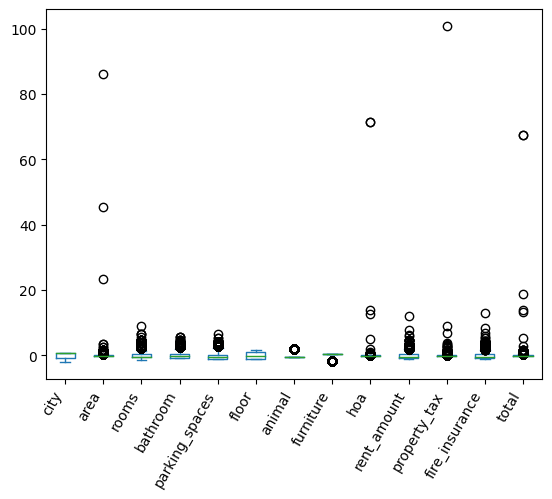

In [ ]:
#verifcando atras de grafico boxplot os outliers e ja aplicando o grafico com uma padronização
df.apply(scale).plot.box()
plt.xticks(rotation=60, ha='right');




In [ ]:
df.head()

,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
0,4,70,2,1,1,32,0,0,2065,3300,211,42,5618
1,4,320,4,4,0,13,0,1,1200,4960,1750,63,7973
2,2,80,1,1,1,31,0,1,1000,2800,0,41,3841
3,2,51,2,1,0,12,0,1,270,1112,22,17,1421
4,4,25,1,1,0,1,1,1,0,800,25,11,836


In [ ]:
#função para contagem coluna a coluna de outliers
def is_outlier(array, extreme=False):

  q1,q3 = np.quantile(array, [.25,.75])
  iqr = q3-q1

  factor = 3. if extreme else 1.5
  upper_outlier = q3 + factor*iqr
  lower_outlier = q1 - factor*iqr

  return (array < lower_outlier) | (array > upper_outlier)

In [ ]:
#contagem de outliers por area
is_outlier(df.area).sum()

672

In [ ]:
#outliers por hoa
is_outlier(df.hoa).sum()

717

In [ ]:
is_outlier(df.property_tax).sum()

1081

In [ ]:
#outliers por total
is_outlier(df.total).sum()

706

Vi a necessidade de criar um outro data set setando valores de area e total para continuar as analises .  


Tendo em vista que outliers tendencia o centro de distribuição de dados , alteram o valor da media . vi a necessidade de setar valores para a variavel total  que será o target (alvo =  variavel resposta dos modelos de previsão que vou ultilizar nesse dataset )


In [ ]:
df2 = df.query("total <=6000 & area <= 6000")

In [ ]:
print(df.shape)
print(df2.shape)

(10692, 13)
(7576, 13)


In [ ]:
df2.head()

,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
0,4,70,2,1,1,32,0,0,2065,3300,211,42,5618
2,2,80,1,1,1,31,0,1,1000,2800,0,41,3841
3,2,51,2,1,0,12,0,1,270,1112,22,17,1421
4,4,25,1,1,0,1,1,1,0,800,25,11,836
6,3,72,2,1,0,32,0,1,740,1900,85,25,2750


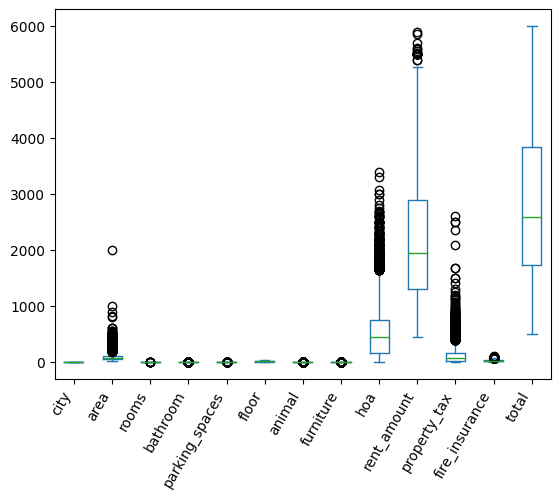

In [ ]:
#padronizado
df2.plot.box()
plt.xticks(rotation=60, ha='right');

In [ ]:
#comparando tamanho dos dados
print(df.shape)
print(df2.shape)

(10692, 13)
(7576, 13)


<Axes: >

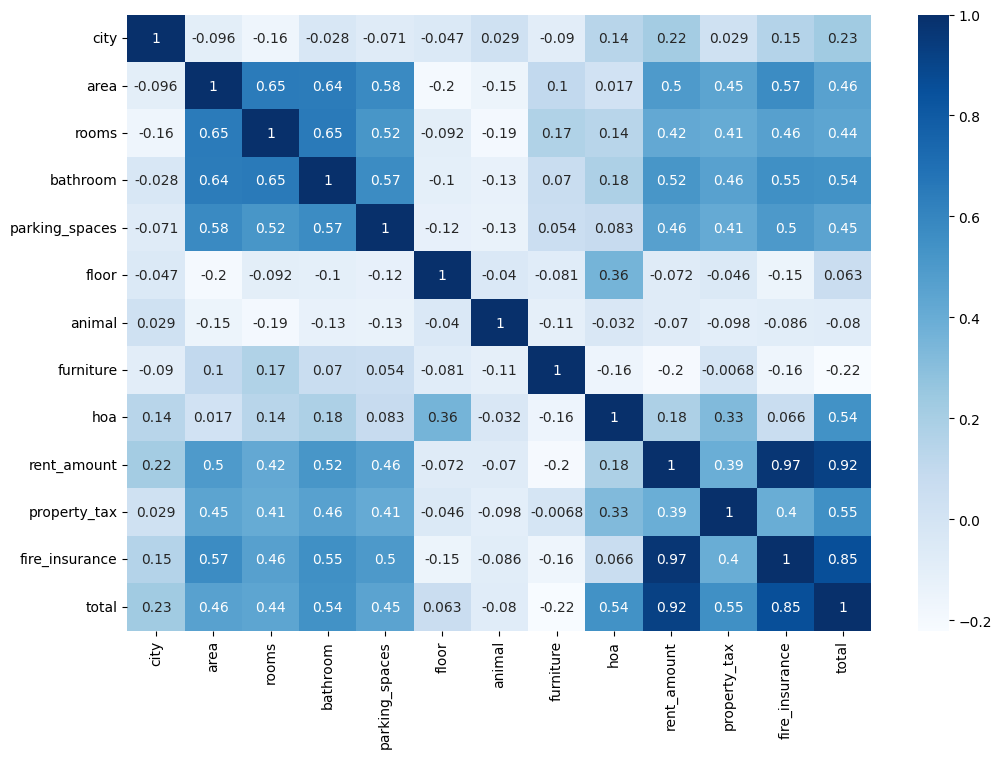

In [ ]:
#verificando correlão de colunas  dentro de heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df2.corr(), cmap='Blues', annot=True)

In [ ]:
df2.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking_spaces', 'floor',
       'animal', 'furniture', 'hoa', 'rent_amount', 'property_tax',
       'fire_insurance', 'total'],
      dtype='object')

In [ ]:
X = df2.drop('rent_amount', axis=1)
y = df2['rent_amount']
lista_coluna= list(X.columns)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [ ]:
X_train

array([[0.5       , 0.02262443, 0.14285714, ..., 0.01226054, 0.06862745,
        0.08725686],
       [1.        , 0.00703871, 0.        , ..., 0.        , 0.09803922,
        0.0636248 ],
       [0.        , 0.0447461 , 0.28571429, ..., 0.07011494, 0.18627451,
        0.29921832],
       ...,
       [1.        , 0.02111614, 0.14285714, ..., 0.00191571, 0.12745098,
        0.21305217],
       [0.        , 0.05982906, 0.42857143, ..., 0.0789272 , 0.31372549,
        0.48936557],
       [0.5       , 0.01709402, 0.        , ..., 0.        , 0.23529412,
        0.27685875]])

In [ ]:
y_test.head(5)


,rent_amount
2733,2900
7646,3000
7578,3700
1801,3290
2785,2000


In [ ]:
print(y_train.head())
y_train.info(

)

7660      637
8416      836
10452    1600
205      1250
1288     1600
Name: rent_amount, dtype: int64
<class 'pandas.core.series.Series'>
Index: 5303 entries, 7660 to 10251
Series name: rent_amount
Non-Null Count  Dtype
--------------  -----
5303 non-null   int64
dtypes: int64(1)
memory usage: 82.9 KB


In [ ]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.5,0.022624,0.142857,0.000000,0.0,0.794118,0.0,1.0,0.088287,0.012261,0.068627,0.087257
1,1.0,0.007039,0.000000,0.000000,0.0,0.000000,1.0,1.0,0.000000,0.000000,0.098039,0.063625
2,0.0,0.044746,0.285714,0.166667,0.2,0.352941,0.0,1.0,0.100059,0.070115,0.186275,0.299218
3,1.0,0.029663,0.142857,0.000000,0.1,0.000000,0.0,1.0,0.067687,0.019157,0.127451,0.190329
4,1.0,0.005530,0.000000,0.000000,0.0,0.852941,0.0,1.0,0.124485,0.000000,0.176471,0.280858
...,...,...,...,...,...,...,...,...,...,...,...,...
5298,1.0,0.042232,0.142857,0.000000,0.1,0.205882,0.0,1.0,0.264862,0.025670,0.352941,0.637520
5299,1.0,0.021619,0.142857,0.000000,0.1,0.676471,0.0,1.0,0.220718,0.032184,0.127451,0.281949
5300,1.0,0.021116,0.142857,0.166667,0.1,0.911765,1.0,1.0,0.117716,0.001916,0.127451,0.213052
5301,0.0,0.059829,0.428571,0.333333,0.1,0.029412,0.0,1.0,0.103002,0.078927,0.313725,0.489366


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42, test_size=0.3)

In [ ]:
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)


predit = gbr.predict(X_test)
erro = abs(predit - y_test)


gbr.score(X_train, y_train)

#RESULTADO
print('R2:', gbr.score(X_train, y_train))
print('MAE:', metrics.mean_absolute_error(y_test, predit))
print('MSE:', metrics.mean_squared_error(y_test, predit))

R2: 0.9952079131816374
MAE: 51.946206176333455
MSE: 8022.557047758402


In [ ]:
#descobrindo quais colunas do data set tem maior peso nos resultado
# E verificando se nao tivemos vazamento de resultados

importances = list(gbr.feature_importances_)

features_importance = [(features,round(importance, 2)) for features, importance in zip(lista_coluna, gbr.feature_importances_)]
features_importance = sorted(features_importance, key = lambda x: x[1], reverse = True)

[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in features_importance]

Variable: fire_insurance       Importance: 0.81
Variable: total                Importance: 0.18
Variable: city                 Importance: 0.0
Variable: area                 Importance: 0.0
Variable: rooms                Importance: 0.0
Variable: bathroom             Importance: 0.0
Variable: parking_spaces       Importance: 0.0
Variable: floor                Importance: 0.0
Variable: animal               Importance: 0.0
Variable: furniture            Importance: 0.0
Variable: hoa                  Importance: 0.0
Variable: property_tax         Importance: 0.0


[None, None, None, None, None, None, None, None, None, None, None, None]

In [ ]:
ada = AdaBoostRegressor(random_state=42)
ada.fit(X_train, y_train)


predit_a = ada.predict(X_test)
erro = abs(predit - y_test)

#RESULTADO
print('R2:', ada.score(X_train, y_train))
print('MAE:', metrics.mean_absolute_error(y_test, predit_a))
print('MSE:', metrics.mean_squared_error(y_test, predit_a))

R2: 0.967498183592405
MAE: 162.77694603305494
MSE: 44777.97532856461


In [ ]:
#descobrindo quais colunas do data set tem maior peso nos resultado
# E verificando se nao tivemos vazamento de resultados

importances = list(ada.feature_importances_)

features_importance = [(features,round(importance, 2)) for features, importance in zip(lista_coluna, ada.feature_importances_)]
features_importance = sorted(features_importance, key = lambda x: x[1], reverse = True)

[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in features_importance]

Variable: fire_insurance       Importance: 0.47
Variable: total                Importance: 0.39
Variable: hoa                  Importance: 0.09
Variable: property_tax         Importance: 0.02
Variable: city                 Importance: 0.01
Variable: parking_spaces       Importance: 0.01
Variable: area                 Importance: 0.0
Variable: rooms                Importance: 0.0
Variable: bathroom             Importance: 0.0
Variable: floor                Importance: 0.0
Variable: animal               Importance: 0.0
Variable: furniture            Importance: 0.0


[None, None, None, None, None, None, None, None, None, None, None, None]

In [ ]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)


predit_r = rf.predict(X_test)
erro = abs(predit_r - y_test)

#RESULTADO
print('R2:', rf.score(X_train, y_train))
print('MAE:', metrics.mean_absolute_error(y_test, predit_r))
print('MSE:', metrics.mean_squared_error(y_test, predit_r))

R2: 0.9986884178240467
MAE: 38.76823141223053
MSE: 10445.769196876374


In [ ]:
from sklearn.ensemble import HistGradientBoostingRegressor

HistGradientBoostingRegressor(random_state=42)
est = HistGradientBoostingRegressor().fit(X, y)
predit = est.predict(X_test)
erro = abs(predit - y_test)
est.score(X, y)

#RESULTADO
print('R2:', est.score(X_test, y_test))
print('MAE:', metrics.mean_absolute_error(y_test, predit))
print('MSE:', metrics.mean_squared_error(y_test, predit))

R2: 0.9985318399974176
MAE: 24.78296080461022
MSE: 1628.9299087180518


O histgradient boosting nao fornece as features importance , pois e um modelo de analises rapida .  

In [ ]:
function ='rent_amount ~ rooms+bathroom+furniture-1'
model = smf.ols(formula=function, data=df2).fit()
results = sm.stats.anova_lm(model)


In [ ]:
df2['predictions'] = model.predict(df2)
results = sm.stats.anova_lm(model)
results

<ipython-input-914-aea60a08effe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['predictions'] = model.predict(df2)


,df,sum_sq,mean_sq,F,PR(>F)
rooms,1.0,3.526803e+10,3.526803e+10,35458.107672,0.000000e+00
bathroom,1.0,1.528195e+09,1.528195e+09,1536.431541,3.827358e-306
furniture,1.0,1.056418e+06,1.056418e+06,1.062112,3.027669e-01
Residual,7573.0,7.532403e+09,9.946393e+05,NaN,NaN


In [ ]:
print(df2[['rent_amount', 'predictions']].head())

   rent_amount  predictions
0         3300  1539.700792
2         2800  1068.561685
3         1112  1515.102659
4          800  1068.561685
6         1900  1515.102659


In [ ]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            rent_amount   R-squared (uncentered):                   0.830
Model:                            OLS   Adj. R-squared (uncentered):              0.830
Method:                 Least Squares   F-statistic:                          1.233e+04
Date:                Sun, 04 Aug 2024   Prob (F-statistic):                        0.00
Time:                        23:50:39   Log-Likelihood:                         -63061.
No. Observations:                7576   AIC:                                  1.261e+05
Df Residuals:                    7573   BIC:                                  1.261e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Apos concluir este estudo , fico com o resultado do stat´s model .


-  Pelo seguintes motivos :
1.  usei algumas bibliotecas de como gradient, random forest , e ada apontam que a Feature (coluna) mais importante para  definir o valore de  rent_amount é a fire_insurance.  apesar de ter sentido  pelo simples modelo da stats model temos mais variaveis que podem justificar o valor de rent_amount .

2. desconfio que mesmo puxando as features importance ( coluna importante )  o resultado de  99%  de r2 seja algo equivocado demais .  uma faixa de 83% com as colunas que realmente são importante para o modelo sem tendencia-lo e algo mais veridico .
3. usei a tecnica de Stepward para analisar o stats model


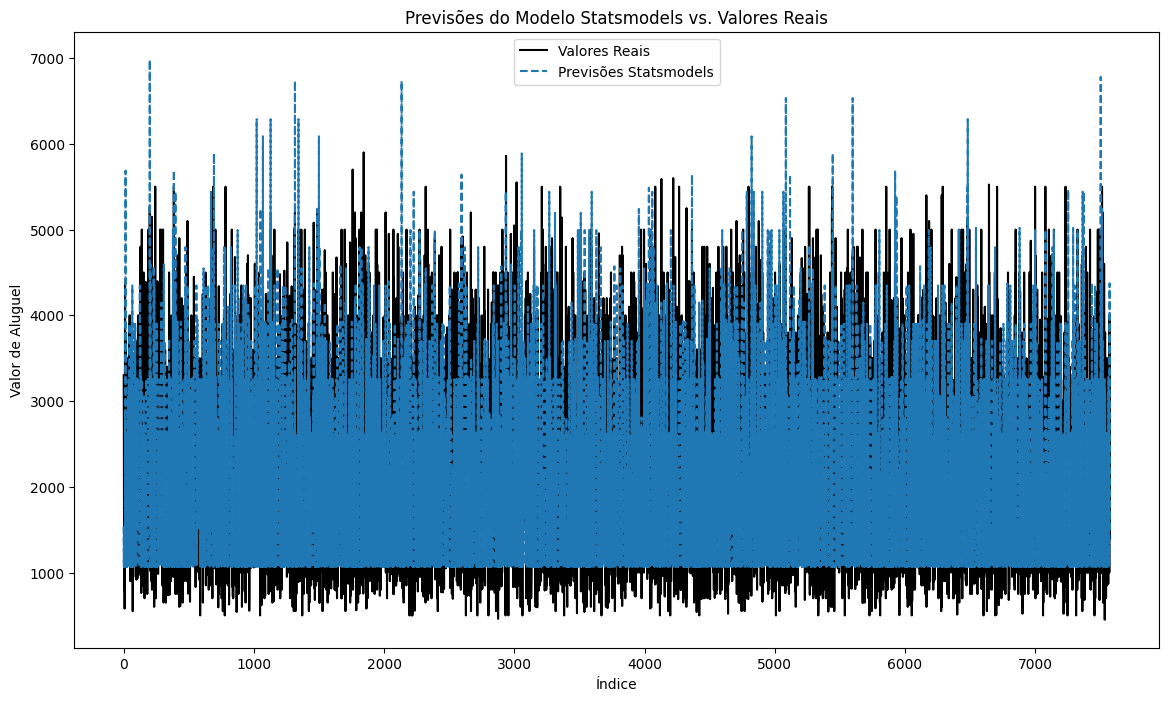

In [ ]:
plt.figure(figsize=(14, 8))
plt.plot(df2['rent_amount'].values, label='Valores Reais', color='black')
plt.plot(df2['predictions'].values, label='Previsões Statsmodels', linestyle='--')
plt.legend()
plt.xlabel('Índice')
plt.ylabel('Valor de Aluguel')
plt.title('Previsões do Modelo Statsmodels vs. Valores Reais')
plt.show()